<a href="https://colab.research.google.com/github/farrelrassya/TimeSeries/blob/main/01.%20Chapter%201%20-%20Time%20Series%20Characteristics/01.Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time-Series Characteristics
A time series is a collection of data points that are stored with respect to
their time. Mathematical and statistical analysis performed on this kind
of data to find hidden patterns and meaningful insight is called **time series analysis**. Time-series modeling techniques are used to understand
past patterns from the data and try to forecast future horizons. These
techniques and methodologies have been evolving for decades.

Observations with continuous timestamps and target variables
are sometimes framed as straightforward regression problems by
decomposing dates into minutes, hours, days, weeks, months, years, and
so on, which is not the right way to handle such data because the results
obtained are poor. In this chapter, you will learn the right approach for
handling time-series data.

There are different kinds of data, such as structured, semistructured,
and unstructured, and each type should be handled in its own way to gain
maximum insight. In this book, we are going to be looking at time-series
data that is structured in manner such as data from the stock market,
weather, birth rates, traffic, bike-sharing apps, etc.
This chapter is a gentle introduction to the types of time-series data, its
components, and ways to decompose it.

# Types of Data
Time-series analysis is a statistical technique that measures a sequential set
of data points. This is a standard measure in terms of time that comes in
three types. look at picture below:

<img src="https://raw.githubusercontent.com/farrelrassya/TimeSeries/main/01.%20Chapter%201%20-%20Time%20Series%20Characteristics/Figure1.1.png" width="600" height="400">

## Time-Series Data

A time series contains data points that increase, decrease, or otherwise
change in chronological order over a period. A time series that
incorporates the records of a single feature or variable is called a univariate
time series. If the records incorporate more than one feature or variable,
the series is called a multivariate time series. In addition, a time series can
be designated in two ways: continuous or discrete.

In a continuous time series, data observation is carried out
continuously throughout the period, as with earthquake seismograph
magnitude data, speech data, etc. Figure1-2 illustrates earthquake data
measured continuously from 1975 to 2015.

<img src="https://raw.githubusercontent.com/farrelrassya/TimeSeries/main/01.%20Chapter%201%20-%20Time%20Series%20Characteristics/Figure1.2.png" alt="Figure1.2" width="600"/>


Figure 1-3 Illustrates temperature behavior in India over a century and
clearly shows that temperature is increasing monotonically.

<img src="https://raw.githubusercontent.com/farrelrassya/TimeSeries/main/01.%20Chapter%201%20-%20Time%20Series%20Characteristics/Figure1.3.png" alt="Figure1.2" width="600"/>


In a discrete time series, data observation is carried out at a specific
time or equally spaced, as with temperature increases or decreases,
exchange rates of currencies, air pressure data, etc. Figure 1-2 illustrates
the analysis of the average temperature of India from 1901 to 2017, which
either increases or decreases with time. This data behavior is discrete.

## Cross-Section Data
Cross-section data is data gathered at a specific point of time for several
subjects such as closing prices of a particular group of stocks on a specific
date, opinion polls of elections, obesity level in population, etc. Cross-section studies are utilized in many research areas such as medical,
economics, psychology, etc. For instance, high blood pressure is one of the
significant risk factors for cause of death in India according to a 2017 WHO
report. WHO has carried out the study of several risk factors (considered
various subjects), which reflects cross-section survey data. Figure 1-4
illustrates the cross-section data.

## Panel Data/Longitudinal Data

Panel data/longitudinal data contains observations of multiple
occurrences collected over various durations of time for the same
individuals. It is data that is determined periodically by the number of
observations in cross-sectional data units such as individuals, companies, or government agencies. Table 1-1 provides examples of data available for
multiple people over the course of a few years where the data gathered
comprises income, age, and sex.

In Table 1-1, datasets A and B (with the attributes income, age, and
sex) gathered throughout the years are for different people. Dataset A
is a depiction of two people, Allen and Malissa, who were subject to
observation over three years (2016, 2017, 2018); this is known as balanced
panel data. Dataset B is called unbalanced panel data because data does
not exist for every individual every year.

# Trend
A trend is a pattern that is observed over a period of time and represents
the mean rate of change with respect to time. A trend usually shows the
tendency of the data to increase/uptrend or decrease/downtrend during
the long run. It is not always necessary that the increase or decrease is in
the same direction throughout the given period of time. A trend line is also
drawn using candlestick charts.
For example, you may have heard about an increase or decrease in
different market commodities such as gold, silver, stock prices, gas, diesel,
etc., or about the rate of interest for banks or home loans increasing or
decreasing. These are all commodity market conditions, which may either
increase or decrease over time, that show a trend in data.

## Detecting Trend Using a Hodrick-Prescott Filter

The Hodrick-Prescott (HP) filter has become a benchmark for getting
rid of trend movements in data. This method is broadly employed
for econometric methods in applied macroeconomics research. The
technique is nonparametric and is used to dissolve a time series into a
trend; it is a cyclical component unaided by economic theory or prior
trend specification. Like all nonparametric methods, the HP filter is
contingent significantly on a tuning parameter that controls the degree of
smoothing. This method is broadly employed in applied macroeconomics
utilized in central banks, international economics agencies, industry, and
government.

Columns in the DataFrame: ['EXINUS']


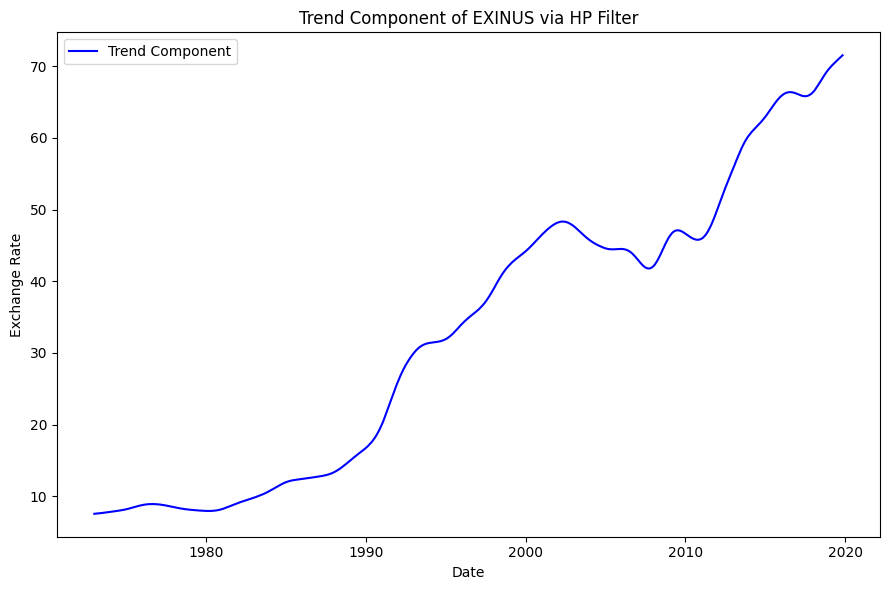

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

# Define the raw URL for the Excel dataset on GitHub
url = 'https://github.com/farrelrassya/TimeSeries/raw/main/Data/India_Exchange_Rate_Dataset.xls'

# Read the Excel file into a DataFrame with the first column parsed as dates and set as index
df = pd.read_excel(url, index_col=0, parse_dates=True)

# (Optional) Print the DataFrame columns to verify 'EXINUS' is present
print("Columns in the DataFrame:", df.columns.tolist())

# Apply the Hodrick-Prescott filter to extract the cyclical and trend components
# The 'lamb' parameter is set to 1600 (commonly used for quarterly data; adjust if needed)
EXINUS_cycle, EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)

# Plot the trend component
plt.figure(figsize=(9, 6))
plt.plot(EXINUS_trend, label='Trend Component', color='blue')
plt.title('Trend Component of EXINUS via HP Filter')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

## Detrending a Time Series
Detrending is the process of removing a trend from time-series data, or it
mentions a change in the mean over time. It is continuously increasing
or decreasing over the duration of time. Identification, modeling, and
even removing trend data from time-series datasets can be beneficial. The
following are methods to detrend time-series data:
1. Pandas differencing
2. SciPy signal
3. HP filter

### Detrending Using Pandas Differencing
The Pandas library has a built-in function to calculate the difference in a
dataset. This diff() function is used both for series and for DataFrames.
It can provide a period value to shift in order to form the difference. The
following code is an example of Pandas differencing.
• Warning is a built-in module of Python that handles the
warning messages.
• Pyplot is a submodule of Matplotlib that is used to
design the graphical representation of the data.

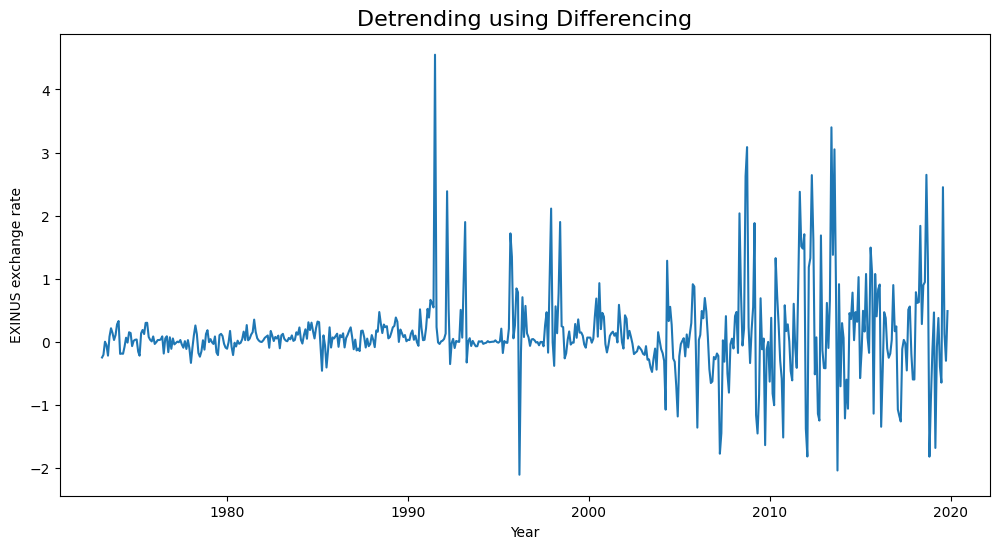

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

diff = df.EXINUS.diff()
plt.figure(figsize=(12,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

### Detrending Using a SciPy Signal
A signal is another form of time-series data. Every signal either increases or
decreases in a different order. Using the SciPy library, this can be removing
the linear trend from the signal data. The following code shows an example
of SciPy detrending.
1. Signal.detrend is a submodule of SciPy that is used to
remove a linear trend along an axis from data.

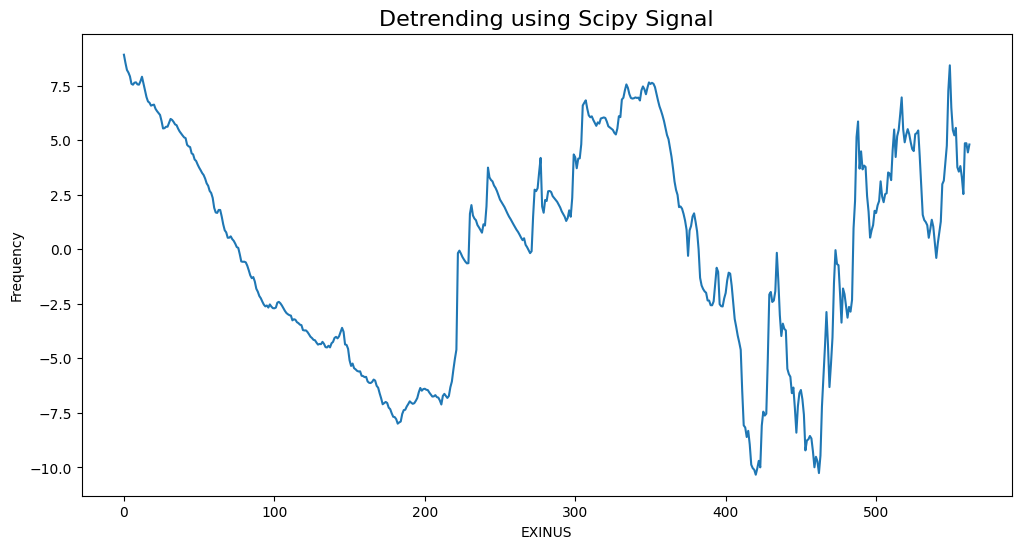

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
detrended = signal.detrend(df.EXINUS.values)
plt.figure(figsize=(12,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

### Detrend Using an HP Filter
An HP filter is also used to detrend a time series and smooth the data. It’s used for removing short-term fluctuations. The following code shows an example of HP filter detrending.

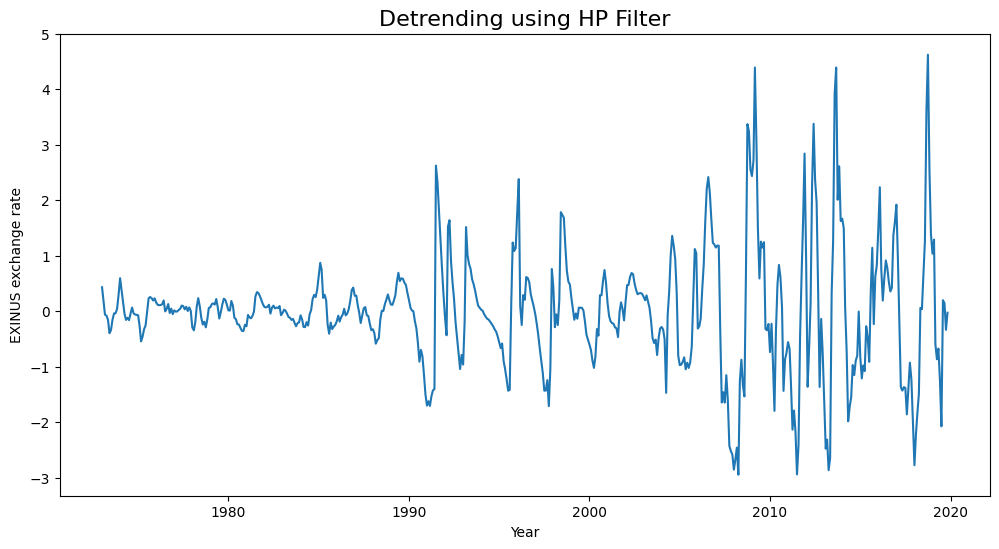

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
EXINUS_cycle, EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
df['trend'] = EXINUS_trend
detrended = df['EXINUS'] - df['trend']  # Correctly placed on its own line
plt.figure(figsize=(12, 6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Seasonality

Seasonality is a periodical fluctuation where the same pattern occurs at a regular interval of time. It is a characteristic of economics, weather, and stock market time-series data; less often, it’s observed in scientific data.
In other industries, many phenomena are characterized by periodically recurring seasonal effects. For example, retail sales tend to increase during Christmas and decrease afterward.

The following methods can be used to detect seasonality:
1. Multiple box plots
2. Autocorrelation plots

## Multiple Box Plots

A box plot is an essential graph to depict data spread out over a range. It is a standard approach to showing the minimum, first quartile, middle, third quartile, and maximum. The following code shows an example of detecting seasonality with the help of multiple box plots.

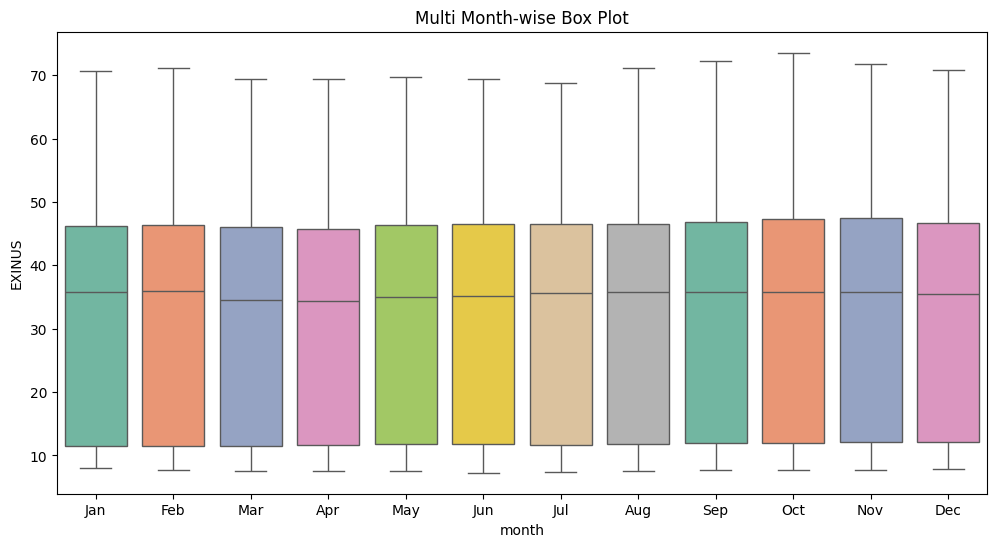

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df=pd.read_excel(url,parse_dates=True)
df['month'] = df['observation_date'].dt.strftime('%b')
df['year'] = [d.year for d in df.observation_date]
df['month'] = [d.strftime('%b') for d in
df.observation_date]
years = df['year'].unique()
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Plot the boxplot with a custom color palette
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='EXINUS', data=df, order=month_order, palette="Set2")
plt.title("Multi Month-wise Box Plot")
plt.show()

## Autocorrelation Plot
Autocorrelation is used to check randomness in data. It helps to identify types of data where the period is not known. For instance, for the monthly
data, if there is a regular seasonal effect, we would hope to see massive peak lags after every 12 months. `Figure 1-10` demonstrates an example of
detecting seasonality with the help of an autocorrelation plot.

<img src="https://raw.githubusercontent.com/farrelrassya/TimeSeries/main/01.%20Chapter%201%20-%20Time%20Series%20Characteristics/Figure%201-10.png" width="600" height="400">



In [6]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(url, index_col=0, parse_dates=True)
plt.rcParams.update({'figure.figsize': (12,6), 'figure.dpi': 1000})
autocorrelation_plot(df.EXINUS.tolist())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

#  Deseasoning of Time-Series Data
Deseasoning means to remove seasonality from time-series data. It is
stripped of the pattern of seasonal effect to deseasonalize the impact.
Time-series data contains four main components.
1. Level means the average value of the time-series data.
2. Trend means an increasing or decreasing value in
time-series data.
3. Seasonality means repeating the pattern of a cycle in
the time-series data.
4. Noise means random variance in time-series data.

<div style="border: 2px solid #007ACC; border-radius: 8px; padding: 15px; background-color: #E6F2FF; text-align: center;">
  <h2 style="color: #007ACC;">💡 Note</h2>
  <p style="font-size: 16px; color: #333;">
    An <strong>additive model</strong> is when time-series data combines these four components for linear trend and seasonality, while a <strong>multiplicative model</strong> multiplies the components to capture nonlinear trends and seasonality.
  </p>
</div>

## Seasonal Decomposition
Decomposition is the process of understanding generalizations and problems related to time-series forecasting. We can leverage seasonal decomposition to remove seasonality from data and check the data only
with the trend, cyclic, and irregular variations. Figure 1-11 illustrates data
without seasonality.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
df = pd.read_excel(url, index_col=0, parse_dates=True)
result_mul = seasonal_decompose(df['EXINUS'], model='multiplicative', extrapolate_trend='freq')
deseason = df['EXINUS'] / result_mul.seasonal
plt.figure(figsize=(12,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Cyclic Variations
Cyclical components are fluctuations around a long trend observed every
few units of time; this behavior is less frequent compared to seasonality. It
is a recurrent process in a time series. In the field of business/economics,
the following are three distinct types of cyclic variations examples:
1. Prosperity: As we know, when organizations prosper,
prices go up, but the benefits also increase. On the
other hand, prosperity also causes over-development,
challenges in transportation, increments in wage rate,
insufficiency in labor, high rates of returns, deficiency
of cash in the market and price concessions, etc.,
leading to depression
2. Depression: As we know, when there is cynicism in
exchange and enterprises, processing plants close
down, organizations fall flat, joblessness spreads, and
the wages and costs are low.
3. Accessibility: This causes idealness of money,
accessibility of cash at a low interest, an increase in demand for goods or money at a low interest rate,
an increase in popular merchandise and ventures
described by the circumstance of recuperation that at
last prompts for prosperity or boom.

## Detecting Cyclical Variations
The following code shows how to decompose time-series data and visualize only a cyclic pattern:

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(url,index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
df['cycle'] =EXINUS_cycle
df['trend'] =EXINUS_trend
df[['cycle']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

## Errors, Unexpected Variations, and Residuals
When trend and cyclical variations are removed from time-series data, the
patterns left behind that cannot be explained are called errors, unexpected
variations, or residuals. Various methods are available to check for
irregular variations such as probability theory, moving averages, and
autoregressive time-series methods. If we can find any cyclic variation in
data, it is considered to be part of the residuals. These variations that occur
due to unexpected circumstances are called unexpected variations or
unpredictable errors.

## Decomposing a Time Series into Its Components
Decomposition is a method used to isolate the time-series data into different elements such as trends, seasonality, cyclic variance, and residuals. We can leverage seasonal decomposition from a stats model

# Time Series Decomposition

To decompose the data into its constituent parts, we can consider the series as **additive** or **multiplicative**.

- **Trends** ($T(t)$): Represents an increase or decrease in the value of the time series data.
- **Seasonality** ($S[t]$): Represents a repeating short-term cycle in the time series data.
- **Cyclic Variations** ($c[t]$): Represents fluctuations in the long-term trends of the time series data.
- **Residuals** ($e[t]$): Represents irregular variations in the time series data.

## Additive Model

The additive model works with linear trends where the changes occur constantly over time. Its formula is:

$$
Y[t] = T[t] + S[t] + c[t] + e[t]
$$

## Multiplicative Model

The multiplicative model works with nonlinear data (such as quadratic or exponential trends). Its formula is:

$$
Y[t] = T[t] \cdot S[t] \cdot c[t] \cdot e[t]
$$


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
df = pd.read_excel(url,index_col=0,parse_dates=True)
result = seasonal_decompose(df['EXINUS'], model='add')
result.plot()
result = seasonal_decompose(df['EXINUS'], model='mul')
result.plot()

# Summary
In this chapter, we discussed what time-series data is and glanced
at various ways of isolating time-series components such as trend,
seasonality, cyclic variations, and errors using multiple techniques. In the
next chapter, you will learn how to perform data wrangling for time-series
data.